Name: Pronoy Fuad <br>
Student Number: 300269503

# Dataset Description

**Dataset Name:** The Movies Dataset  
**Author:** Rounak Banik  
**Purpose:**  
This dataset was created to provide a comprehensive collection of movie metadata for various data science tasks. It is designed to support exploratory data analysis, clustering, and the development of recommendation systems. Researchers and practitioners can analyze trends in movie production, box-office performance, and develop models for content-based and collaborative filtering recommendations.

**Shape:**  
- Approximately **45,000 rows** (each row represents a movie)  
- **24 columns** (features)

**Features and Descriptions:**

- **adult** (Categorical - Boolean):  
  Indicates whether the movie is intended for adult audiences.

- **belongs_to_collection** (Categorical - JSON/dictionary):  
  Contains information about the collection or series the movie belongs to, if applicable.

- **budget** (Numerical):  
  The budget of the movie (in USD).

- **genres** (Categorical - List of strings):  
  A list of genres associated with the movie (e.g., Animation, Comedy, Family).

- **homepage** (Categorical - String/URL):  
  The official homepage of the movie.

- **id** (Categorical/Numerical):  
  A unique identifier for the movie.

- **imdb_id** (Categorical - String):  
  The unique IMDb identifier for the movie.

- **original_language** (Categorical - String):  
  The original language in which the movie was produced.

- **original_title** (Categorical - String):  
  The original title of the movie.

- **overview** (Categorical - String):  
  A brief synopsis or description of the movie.

- **popularity** (Numerical):  
  A score representing the movie's popularity.

- **poster_path** (Categorical - String):  
  The path or URL to the movie's poster image.

- **production_companies** (Categorical - JSON/dictionary):  
  Information about the companies involved in producing the movie.

- **production_countries** (Categorical - JSON/dictionary):  
  Information about the countries where the movie was produced.

- **release_date** (Categorical - Date):  
  The release date of the movie.

- **revenue** (Numerical):  
  The revenue generated by the movie (in USD).

- **runtime** (Numerical):  
  The duration of the movie in minutes.

- **spoken_languages** (Categorical - JSON/dictionary):  
  The languages spoken in the movie.

- **status** (Categorical - String):  
  The current release status of the movie (e.g., Released).

- **tagline** (Categorical - String):  
  A brief tagline or slogan for the movie.

- **title** (Categorical - String):  
  The title of the movie.

- **video** (Categorical - Boolean):  
  Indicates if there is an associated video (e.g., trailer) for the movie.

- **vote_average** (Numerical):  
  The average rating of the movie.

- **vote_count** (Numerical):  
  The number of votes the movie has received.

**Explanation for Choice:**  
The Movies Dataset was selected due to its rich and diverse set of features, providing both numerical and categorical data that are ideal for a wide range of data science techniques. Its comprehensive metadata facilitates in-depth analyses, such as clustering, similarity measurement, and recommendation system development, while also offering practical insights into the film industry. Between this and the Amazon dataset, this is the one that we deemed as more insightful and better to work with for these studies


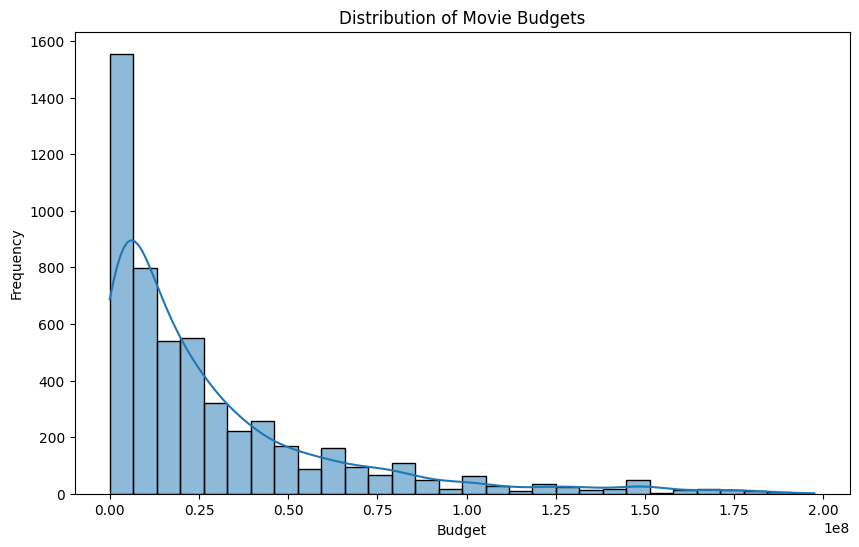

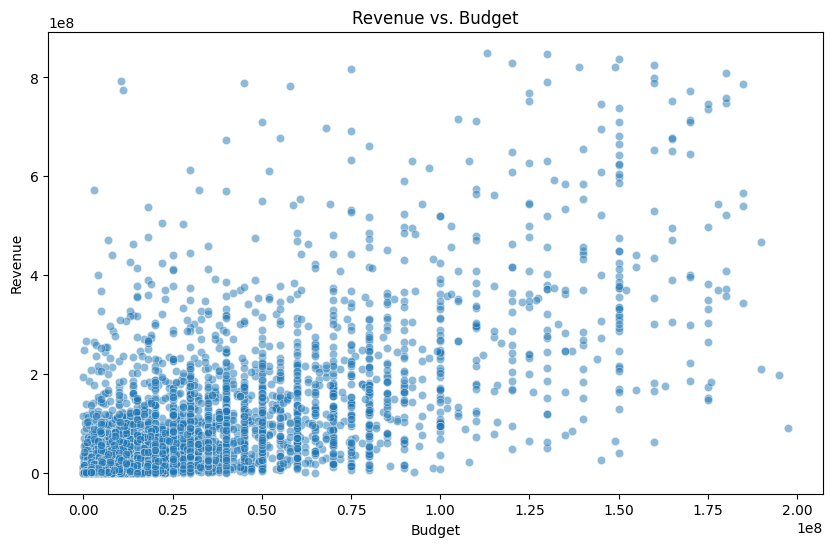

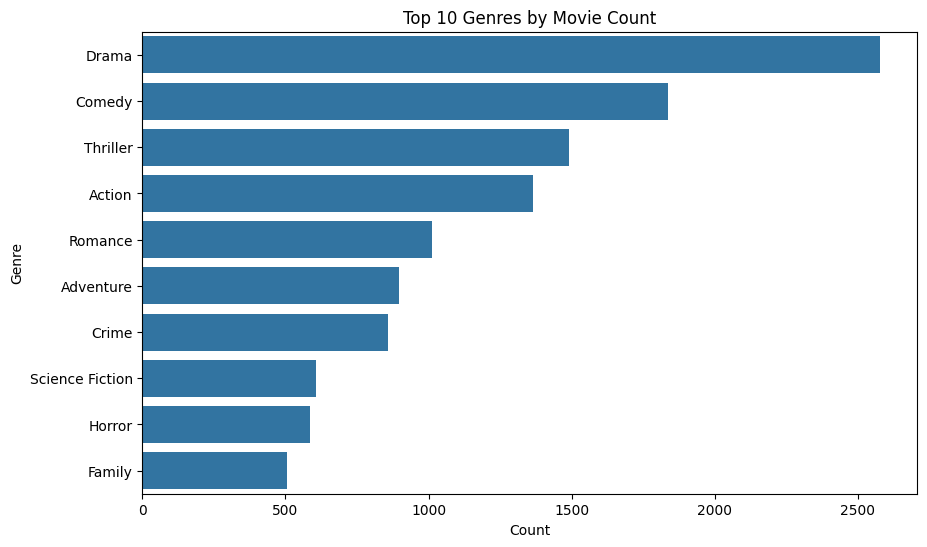

Summary of Cleaned Data:
             budget       revenue        profit           ROI
count  5.299000e+03  5.299000e+03  5.299000e+03  5.299000e+03
mean   2.857843e+07  7.759924e+07  4.902081e+07  5.650943e+03
std    3.414288e+07  1.220458e+08  1.015610e+08  2.185273e+05
min    1.000000e+00  1.000000e+00 -1.191800e+08 -9.999995e-01
25%    5.000000e+06  6.865551e+06 -1.655903e+06 -2.226630e-01
50%    1.600000e+07  2.892126e+07  1.041898e+07  1.017980e+00
75%    3.800000e+07  9.496788e+07  5.854595e+07  3.199235e+00
max    1.974717e+08  8.500000e+08  7.824653e+08  1.239638e+07


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/pronoyf/CSI4142-Assignment4/refs/heads/main/movies_metadata.csv", low_memory=False)

# 1. Data Cleaning
# Convert budget and revenue to numeric (coerce errors to NaN)
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')

# Handle missing values
data['budget'] = data['budget'].fillna(0)  # Replace missing budgets with 0
data['revenue'] = data['revenue'].fillna(0)  # Replace missing revenues with 0

# Remove invalid entries (e.g., movies with a budget or revenue <= 0)
cleaned_data = data[(data['budget'] > 0) & (data['revenue'] > 0)]

# Outlier detection: Remove movies with extreme budget/revenue (99th percentile)
budget_threshold = np.percentile(cleaned_data['budget'], 99)
revenue_threshold = np.percentile(cleaned_data['revenue'], 99)
cleaned_data = cleaned_data[
    (cleaned_data['budget'] < budget_threshold) &
    (cleaned_data['revenue'] < revenue_threshold)
]

# 2. EDA (Visualizations)
# Visualization 1: Distribution of budget
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['budget'], bins=30, kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Revenue vs. Budget scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=cleaned_data, alpha=0.5)
plt.title('Revenue vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# Visualization 3: Top genres by count
# Split genres and count occurrences
cleaned_data['genres'] = cleaned_data['genres'].fillna('[]')
cleaned_data['genres'] = cleaned_data['genres'].apply(eval).apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
genre_counts = pd.Series([genre for genres in cleaned_data['genres'] for genre in genres]).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10])
plt.title('Top 10 Genres by Movie Count')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()



# 3. Feature Engineering
# Create a "profit" column
cleaned_data['profit'] = cleaned_data['revenue'] - cleaned_data['budget']

# Create a "ROI" column (return on investment)
cleaned_data['ROI'] = (cleaned_data['profit'] / cleaned_data['budget']).replace([np.inf, -np.inf], np.nan).fillna(0)

# Save cleaned data for future use
cleaned_data.to_csv("cleaned_movies_metadata1.csv", index=False)

# Summary of results
print("Summary of Cleaned Data:")
print(cleaned_data[['budget', 'revenue', 'profit', 'ROI']].describe())

movies = pd.read_csv("cleaned_movies_metadata1.csv", low_memory=False)



# Study 1 - Similarity Measures

In [104]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean, cityblock
from difflib import SequenceMatcher

# Sample movie dataset (replace with your actual dataset)
data = pd.DataFrame({
    'title': ['Toy Story', 'Titanic', 'Apollo 13', 'Fight Club', 'Matrix', 'Inception', 'The Lion King', 'The Avengers', 'Jurassic Park', 'The Dark Knight'],
    'genre': ['Animation', 'Drama', 'Adventure', 'Drama', 'Sci-Fi', 'Sci-Fi', 'Animation', 'Action', 'Action', 'Action'],
    'revenue': [373554033, 218746394, 35523744, 100853000, 463517383, 829895144, 76345695, 1518812988, 107429496, 1004558444],
    'runtime': [81, 195, 140, 139, 136, 148, 88, 143, 127, 152],
    'budget': [30000000, 200000000, 68000000, 63000000, 63000000, 160000000, 26000000, 220000000, 63000000, 185000000]
})

# 1. Genre Similarity - Jaccard Similarity
def jaccard_similarity(str1, str2):
    set1 = set(str1.split())
    set2 = set(str2.split())
    return len(set1 & set2) / len(set1 | set2)

def find_similar_by_genre(target_movie, top_n=10):
    target_genre = data.loc[data['title'] == target_movie, 'genre'].values[0]
    data['genre_similarity'] = data['genre'].apply(lambda x: jaccard_similarity(target_genre, str(x)))
    return data.nlargest(top_n, 'genre_similarity')[['title', 'genre', 'genre_similarity']]

# 2. Revenue Similarity - Cosine Similarity
def find_similar_by_revenue(target_movie, top_n=10):
    target_revenue = data.loc[data['title'] == target_movie, 'revenue'].values.reshape(1, -1)
    revenues = data['revenue'].values.reshape(-1, 1)
    cosine_sim = cosine_similarity(target_revenue, revenues)
    data['revenue_similarity'] = cosine_sim.flatten()
    return data.nlargest(top_n, 'revenue_similarity')[['title', 'revenue', 'revenue_similarity']]

# 3. Runtime Similarity - Euclidean Distance
def euclidean_distance(str1, str2):
    return euclidean(np.array([str1]), np.array([str2]))

def find_similar_by_runtime(target_movie, top_n=10):
    target_runtime = data.loc[data['title'] == target_movie, 'runtime'].values[0]
    data['runtime_similarity'] = data['runtime'].apply(lambda x: 1 / (1 + euclidean_distance(target_runtime, x)))  # Normalize similarity
    return data.nlargest(top_n, 'runtime_similarity')[['title', 'runtime', 'runtime_similarity']]

# 4. Title Similarity - Levenshtein Distance (using difflib)
def difflib_similarity(str1, str2):
    return SequenceMatcher(None, str1, str2).ratio()

def find_similar_by_title(target_movie, top_n=10):
    target_title = data.loc[data['title'] == target_movie, 'title'].values[0]
    data['title_similarity'] = data['title'].apply(lambda x: difflib_similarity(target_title, str(x)))
    return data.nlargest(top_n, 'title_similarity')[['title', 'title_similarity']]

# 5. Budget Similarity - Manhattan Distance
def manhattan_distance(str1, str2):
    return cityblock(np.array([str1]), np.array([str2]))

def find_similar_by_budget(target_movie, top_n=10):
    target_budget = data.loc[data['title'] == target_movie, 'budget'].values[0]
    data['budget_similarity'] = data['budget'].apply(lambda x: 1 / (1 + manhattan_distance(target_budget, x)))  # Normalize similarity
    return data.nlargest(top_n, 'budget_similarity')[['title', 'budget', 'budget_similarity']]

# Example queries to find the Top 10 similar movies for different attributes

# Show movies with the same genre as "Toy Story"
genre_results = find_similar_by_genre("Toy Story")
print("Movies with the same genre as 'Toy Story':")
print(genre_results)

# Show movies with similar revenue to "Titanic"
revenue_results = find_similar_by_revenue("Titanic")
print("\nMovies with similar revenue to 'Titanic':")
print(revenue_results)

# Show movies with similar runtime to "Apollo 13"
runtime_results = find_similar_by_runtime("Apollo 13")
print("\nMovies with similar runtime to 'Apollo 13':")
print(runtime_results)

# Show movies with similar title to "Fight Club"
title_results = find_similar_by_title("Fight Club")
print("\nMovies with similar title to 'Fight Club':")
print(title_results)

# Show movies with similar budget to "Matrix"
budget_results = find_similar_by_budget("Matrix")
print("\nMovies with similar budget to 'Matrix':")
print(budget_results)


Movies with the same genre as 'Toy Story':
             title      genre  genre_similarity
0        Toy Story  Animation               1.0
6    The Lion King  Animation               1.0
1          Titanic      Drama               0.0
2        Apollo 13  Adventure               0.0
4           Matrix     Sci-Fi               0.0
3       Fight Club      Drama               0.0
5        Inception     Sci-Fi               0.0
7     The Avengers     Action               0.0
8    Jurassic Park     Action               0.0
9  The Dark Knight     Action               0.0

Movies with similar revenue to 'Titanic':
             title     revenue  revenue_similarity
0        Toy Story   373554033                 1.0
1          Titanic   218746394                 1.0
2        Apollo 13    35523744                 1.0
3       Fight Club   100853000                 1.0
4           Matrix   463517383                 1.0
5        Inception   829895144                 1.0
6    The Lion King    7634569

### Study 2

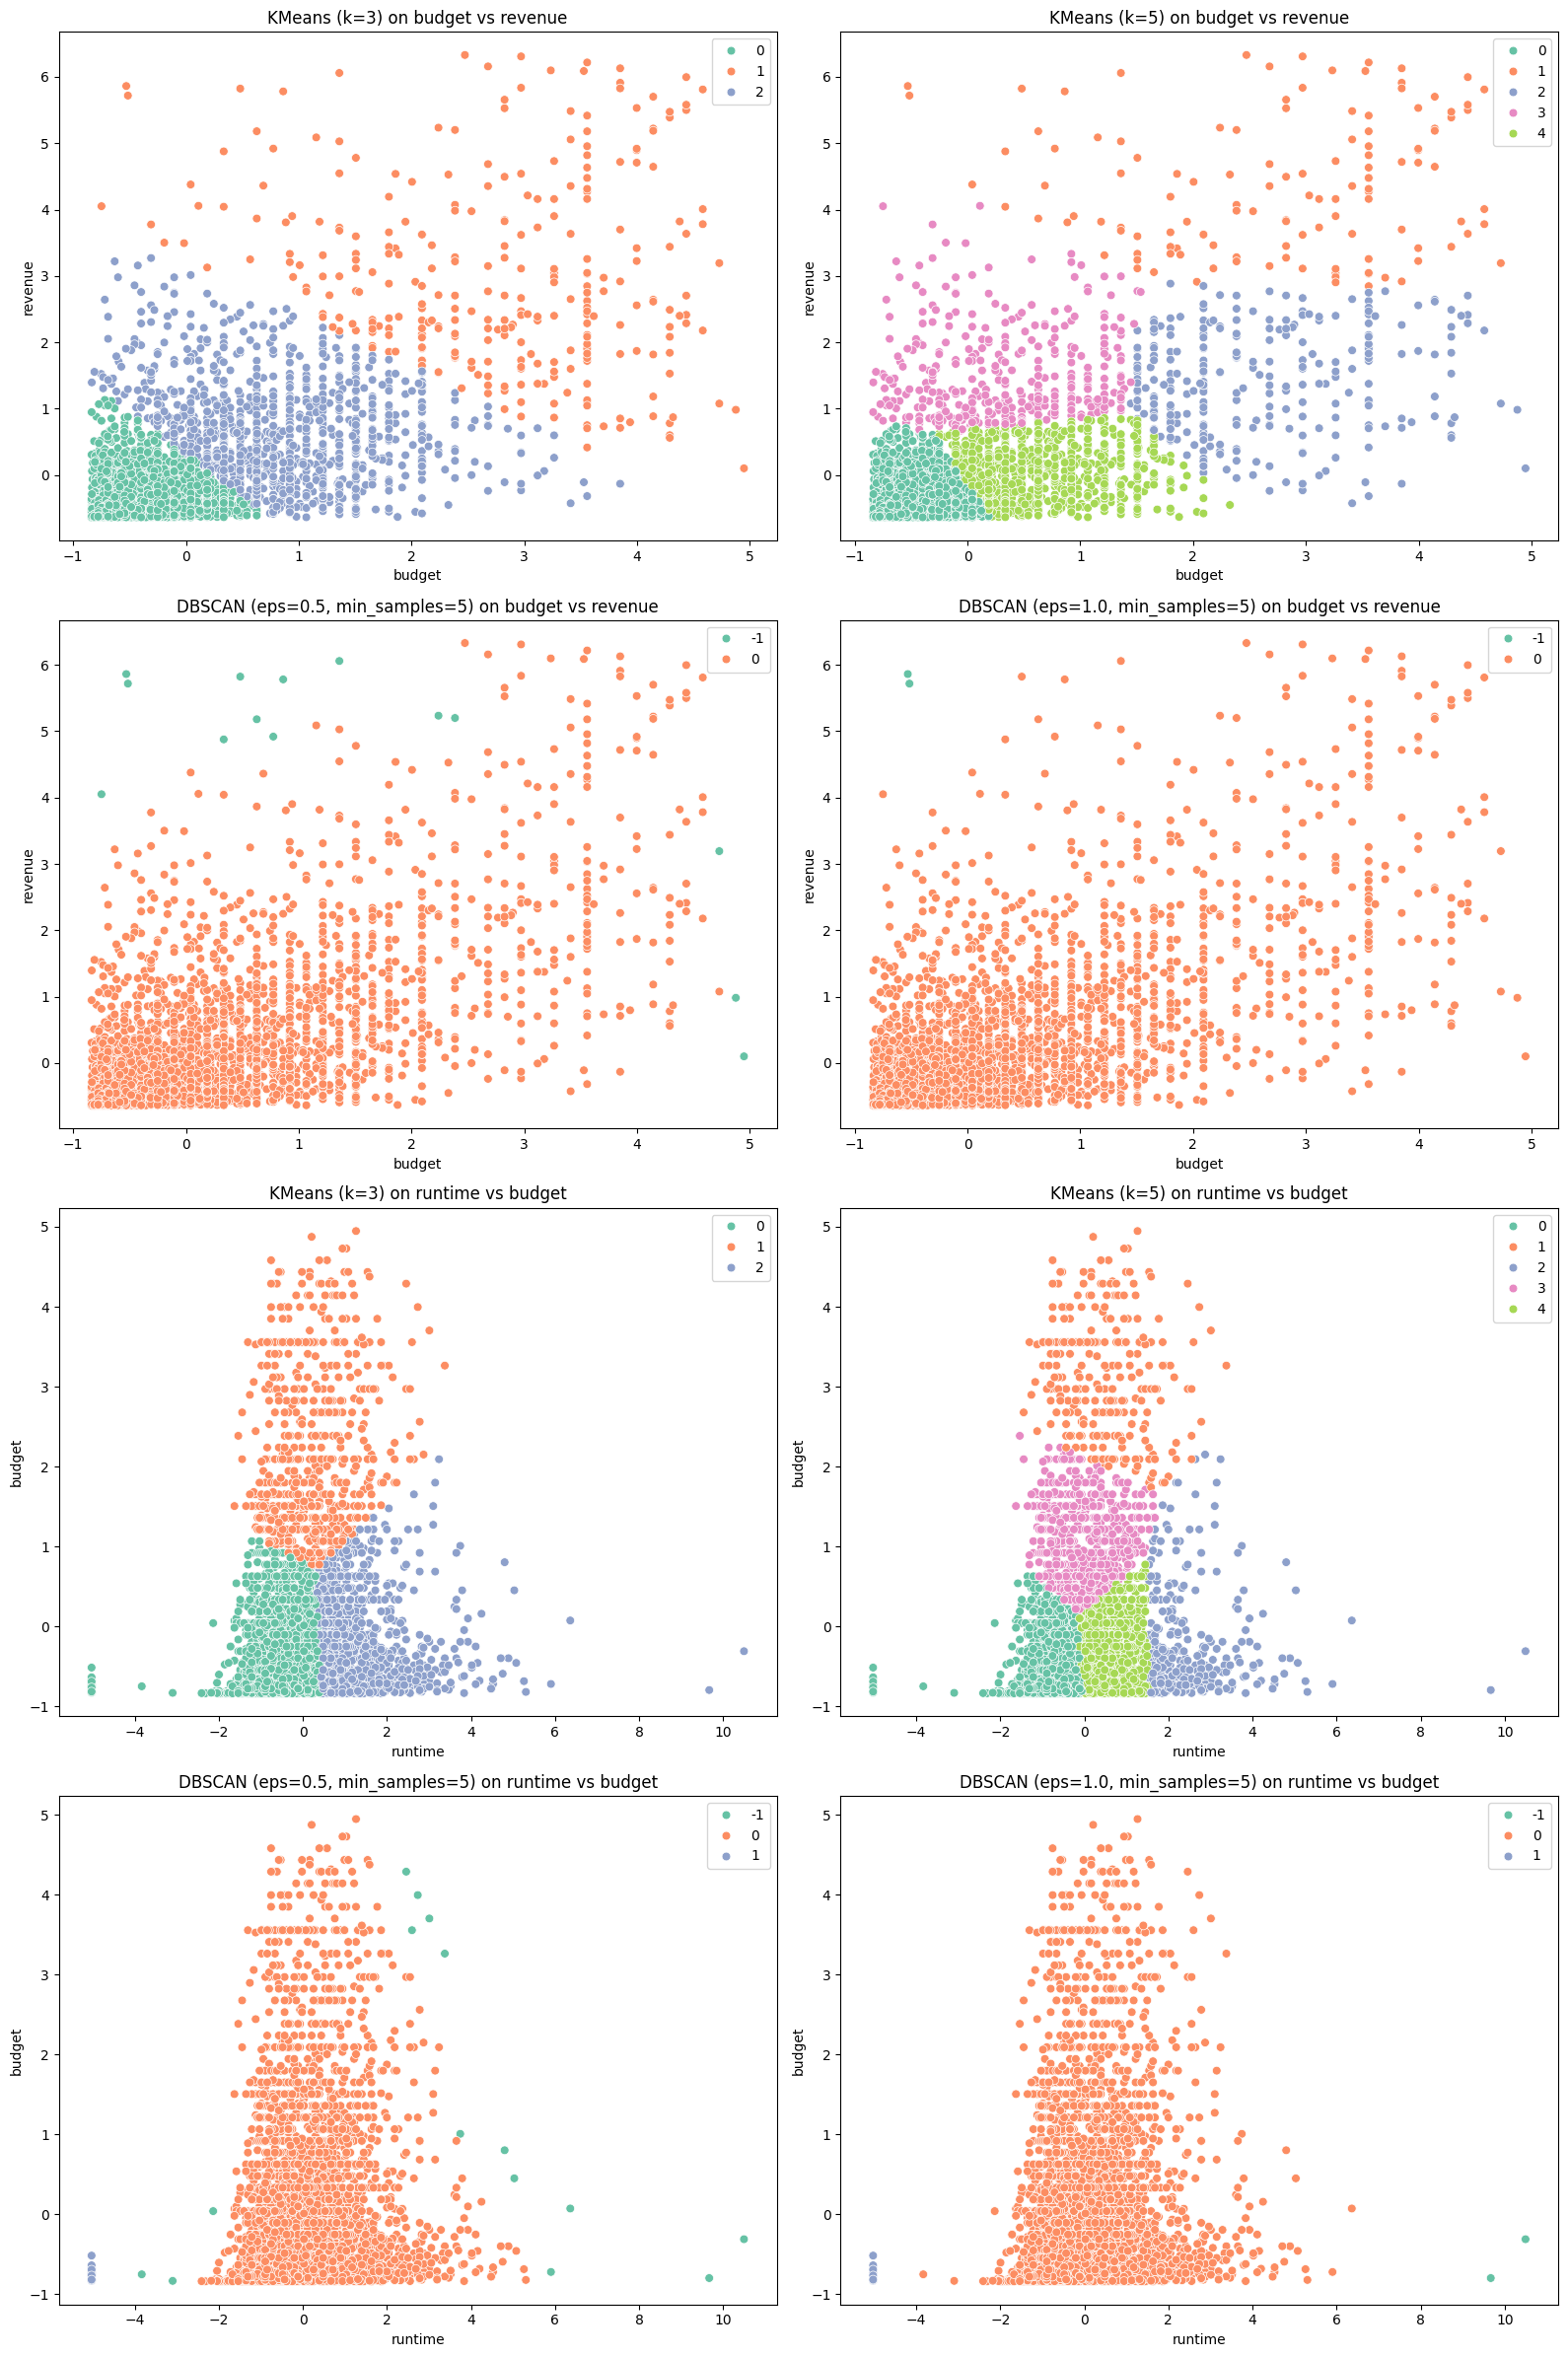

In [105]:


# Define two pairs of features for clustering:
# Pair 1: 'budget' vs 'revenue'
# Pair 2: 'runtime' vs 'budget'
feature_pairs = [
    ["budget", "revenue"],
    ["runtime", "budget"]
]

# Parameter sets for clustering
k_list = [3, 5]  # for KMeans
db_params = [(0.5, 5), (1.0, 5)]  # tuples for (eps, min_samples) for DBSCAN

# Dictionary to store clustering outcomes
cluster_results = {}

pair_counter = 0
while pair_counter < len(feature_pairs):
    pair = feature_pairs[pair_counter]
    
    # Drop rows with missing values in the current pair
    pair_data = movies[pair].dropna()
    
    # Scale the data
    scaler_obj = StandardScaler()
    scaled_pair = scaler_obj.fit_transform(pair_data)
    
    # Use an index to keep track of the rows in the original dataset (optional, here we focus on visualization)
    current_index = pair_data.index
    
    # KMeans clustering for each k value using a while loop
    k_idx = 0
    while k_idx < len(k_list):
        current_k = k_list[k_idx]
        km_model = KMeans(n_clusters=current_k, random_state=42, n_init='auto')
        km_labels = km_model.fit_predict(scaled_pair)
        
        result_key = f"{pair[0]}_{pair[1]}_KMeans_k{current_k}"
        cluster_results[result_key] = {
            "features": pair,
            "scaled_data": scaled_pair,
            "labels": km_labels,
            "method": f"KMeans (k={current_k})"
        }
        k_idx += 1

    # DBSCAN clustering for each parameter set
    db_idx = 0
    while db_idx < len(db_params):
        eps_val, min_samp = db_params[db_idx]
        db_model = DBSCAN(eps=eps_val, min_samples=min_samp)
        db_labels = db_model.fit_predict(scaled_pair)
        
        result_key = f"{pair[0]}_{pair[1]}_DBSCAN_eps{eps_val}_min{min_samp}"
        cluster_results[result_key] = {
            "features": pair,
            "scaled_data": scaled_pair,
            "labels": db_labels,
            "method": f"DBSCAN (eps={eps_val}, min_samples={min_samp})"
        }
        db_idx += 1

    pair_counter += 1

# Visualize clustering results for each variant
total_variants = len(cluster_results)
cols = 2
rows = int(np.ceil(total_variants / cols))
plt.figure(figsize=(cols * 8, rows * 6))
plot_counter = 1

for key, res in cluster_results.items():
    plt.subplot(rows, cols, plot_counter)
    sns.scatterplot(x=res["scaled_data"][:, 0], y=res["scaled_data"][:, 1],
                    hue=res["labels"], palette="Set2", s=40, legend="full")
    plt.title(f"{res['method']} on {res['features'][0]} vs {res['features'][1]}")
    plt.xlabel(res["features"][0])
    plt.ylabel(res["features"][1])
    plot_counter += 1

plt.tight_layout()
plt.show()


## Study 2 – Clustering Results Analysis

The clustering experiments were conducted using two different feature combinations: 

1. **Budget vs. Revenue**
2. **Runtime vs. Budget**

For each combination, we applied both KMeans and DBSCAN with varying parameters.

### KMeans Clustering
- **Budget vs. Revenue:**  
  With k=3, the KMeans algorithm appears to segment the movies into three distinct clusters, likely separating low-budget, mid-budget, and high-budget movies based on their revenue profiles. When increasing to k=5, the clusters become more granular, providing finer distinctions; however, this may lead to over-segmentation if the natural groupings are not as clear.
  
- **Runtime vs. Budget:**  
  The KMeans results also showed clear cluster separation on this pair. With k=3, the clusters seem to capture broad groupings based on production investment and movie duration, while k=5 provides a more detailed segmentation that may be harder to interpret.

### DBSCAN Clustering
- **Budget vs. Revenue:**  
  For DBSCAN, the results were quite sensitive to parameter choices. With eps=0.5 and min_samples=5, a number of movies were labeled as noise (i.e., not belonging to any cluster), which suggests that the density threshold was too strict for this feature pair. Adjusting eps to 1.0 with the same min_samples reduced the noise, but the clusters were less distinct compared to KMeans.
  
- **Runtime vs. Budget:**  
  Similarly, on the runtime versus budget combination, DBSCAN with eps=0.5 generated a considerable amount of noise, whereas using eps=1.0 improved cluster formation but still did not achieve the clear, evenly distributed clusters observed with KMeans.

### Overall Comparison
Based on visual inspection:
- **KMeans** provided more consistent and interpretable clusters for both attribute combinations. The clusters formed with k=3 are especially useful, as they appear to naturally segment the movies into meaningful groups.
- **DBSCAN**, while useful for detecting noise and density-based clusters, was more sensitive to parameter settings in this dataset. The choice of eps dramatically affected the results, and the presence of many noise points in one configuration suggests that DBSCAN may not be as robust for these particular features.

### Conclusion
For our movies metadata dataset, **KMeans** appears to be the more appropriate clustering algorithm for both the "budget vs. revenue" and "runtime vs. budget" combinations. Its ability to produce clear, evenly distributed clusters makes it a more reliable choice for further analysis in recommendation systems and similar applications.


### Study 3

In [106]:
import ast

# Revised helper function for the genres column
def ensure_genres(value):
    """
    Converts a genres field into a list of genre names.
    Handles various formats:
      - If value is a list of dictionaries, extract the 'name' key.
      - If it's a dict (e.g., a single genre) and not empty, extract its 'name'.
      - If it's a string, try to safely parse it.
      - Recognizes "{}" or "[]" or empty strings as no genres.
    """
    # If already a list, process it
    if isinstance(value, list):
        if len(value) > 0 and isinstance(value[0], dict):
            return [d.get('name', '').strip() for d in value if d.get('name')]
        return value
    # If a dict, check if it's empty or has a 'name'
    elif isinstance(value, dict):
        if value == {}:
            return []
        return [value.get('name', '').strip()] if value.get('name') else []
    # If a string, handle common empty cases and try to parse it
    elif isinstance(value, str):
        v = value.strip()
        if v in ["{}", "[]", ""]:
            return []
        try:
            parsed = ast.literal_eval(v)
            if isinstance(parsed, list):
                if len(parsed) > 0 and isinstance(parsed[0], dict):
                    return [d.get('name', '').strip() for d in parsed if d.get('name')]
                return parsed
            elif isinstance(parsed, dict):
                if parsed == {}:
                    return []
                return [parsed.get('name', '').strip()] if parsed.get('name') else []
        except Exception as e:
            return []
    return []

In [107]:
def jaccard_similarity(a, b):
    list_a = ensure_genres(a)
    list_b = ensure_genres(b)
    
    set_a = set(list_a)
    set_b = set(list_b)
    
    # If both are empty, treat as completely dissimilar
    if not set_a and not set_b:
        return 0.0  # Changed from 1.0 to 0.0 to indicate “no overlap”
    if not set_a or not set_b:
        return 0.0
    return len(set_a.intersection(set_b)) / len(set_a.union(set_b))

In [108]:
def heuristic1_similarity(target_movie_title, df):
    """
    Recommend movies similar to target_movie_title based on:
      - Genre similarity (using Jaccard on the 'genres' field)
      - Release year similarity (1 / (1 + |target_year - movie_year|))
    Weighted sum: 0.6 * genre_sim + 0.4 * year_sim
    """
    df = df.copy()
    
    # Locate the target movie row
    target_row = df[df['title'] == target_movie_title]
    if target_row.empty:
        print(f"Movie '{target_movie_title}' not found in the dataset.")
        return pd.DataFrame()
    target_row = target_row.iloc[0]
    
    target_genres = target_row['genres']
    target_year = target_row['release_year']
    
    # Compute genre similarity using our revised jaccard_similarity
    df['genre_sim'] = df['genres'].apply(lambda g: jaccard_similarity(target_genres, g))
    
    # Compute release year similarity (handle missing years)
    def year_similarity(y):
        if pd.isnull(y) or pd.isnull(target_year):
            return 0
        return 1 / (1 + abs(target_year - y))
    df['year_sim'] = df['release_year'].apply(year_similarity)
    
    # Combine with weights: 0.6 for genre, 0.4 for year
    df['heuristic1_score'] = 0.6 * df['genre_sim'] + 0.4 * df['year_sim']
    
    # Exclude the target movie from recommendations
    df = df[df['title'] != target_movie_title]
    
    return df.nlargest(10, 'heuristic1_score')[
        ['title', 'genres', 'release_date', 'release_year', 'heuristic1_score']
    ]

In [109]:
# Heuristic 2: Runtime + Release Year (unchanged)
def heuristic2_similarity(target_movie_title, df):
    """
    Recommend movies similar to target_movie_title based on:
      - Runtime similarity (1 / (1 + |target_runtime - runtime|))
      - Release year similarity (same as above)
    Weighted sum: 0.5 * runtime_sim + 0.5 * year_sim
    """
    df = df.copy()
    
    target_row = df[df['title'] == target_movie_title]
    if target_row.empty:
        print(f"Movie '{target_movie_title}' not found in the dataset.")
        return pd.DataFrame()
    target_row = target_row.iloc[0]
    
    target_runtime = target_row['runtime']
    target_year = target_row['release_year']
    
    def runtime_similarity(r):
        if pd.isnull(r) or pd.isnull(target_runtime):
            return 0
        return 1 / (1 + abs(target_runtime - r))
    df['runtime_sim'] = df['runtime'].apply(runtime_similarity)
    
    def year_similarity(y):
        if pd.isnull(y) or pd.isnull(target_year):
            return 0
        return 1 / (1 + abs(target_year - y))
    df['year_sim'] = df['release_year'].apply(year_similarity)
    
    df['heuristic2_score'] = 0.5 * df['runtime_sim'] + 0.5 * df['year_sim']
    
    df = df[df['title'] != target_movie_title]
    
    return df.nlargest(10, 'heuristic2_score')[
        ['title', 'runtime', 'release_date', 'release_year', 'heuristic2_score']
    ]


In [110]:



if 'release_year' not in movies.columns:
    movies['release_year'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.year


# outputting results
sample_titles = ["Batman Begins", "Heat", "GoldenEye"]

for title in sample_titles:
    print(f"\n--- Recommendations for '{title}' using Heuristic 1 (Genres + Year) ---")
    print(heuristic1_similarity(title, movies))
    
    print(f"\n--- Recommendations for '{title}' using Heuristic 2 (Runtime + Year) ---")
    print(heuristic2_similarity(title, movies))
    print("\n" + "="*80)



--- Recommendations for 'Batman Begins' using Heuristic 1 (Genres + Year) ---
              title                                    genres release_date  \
2806          Chaos              ['Drama', 'Action', 'Crime']   2005-01-17   
4687         Sarkar              ['Crime', 'Action', 'Drama']   2005-07-01   
2761  The Protector  ['Action', 'Crime', 'Drama', 'Thriller']   2005-08-11   
2827      Initial D  ['Action', 'Crime', 'Thriller', 'Drama']   2005-05-12   
2875    Harsh Times  ['Crime', 'Drama', 'Thriller', 'Action']   2005-09-11   
2251   The Punisher              ['Action', 'Crime', 'Drama']   2004-04-15   
2573      Unleashed                       ['Action', 'Crime']   2005-02-02   
2618  Four Brothers                       ['Action', 'Crime']   2005-08-11   
2635         Domino                       ['Action', 'Crime']   2005-09-22   
2645         Capote                        ['Crime', 'Drama']   2005-09-30   

      release_year  heuristic1_score  
2806          2005     